In [2]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from pathlib import Path

#Python Library not used in class
from PyPDF2 import PdfReader

In [3]:
# set path
car_path = "Dataset - Electric Vehicle Population/Electric_Vehicle_Population_Data.csv"

# read the csv file into pandas and remove unnamed columns
car_df = pd.read_csv(car_path, index_col=0, encoding="UTF-8")
car2_df = car_df.dropna(how="any", axis=0)

car2_df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
VIN (1-10),,,,,,,,,,,,,,,,
KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
# Find Total for each car Make
car3_df = car2_df.value_counts(['Make']).reset_index(name='Make Total')

car3_df

,Make,Make Total
0,TESLA,68821
1,NISSAN,13481
2,CHEVROLET,12003
3,FORD,7592
4,BMW,6426
5,KIA,6186
6,TOYOTA,5195
7,VOLKSWAGEN,4064
8,VOLVO,3529
9,JEEP,3283


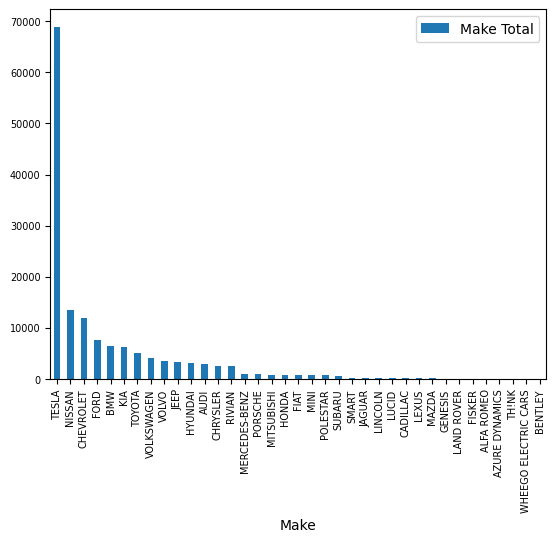

In [5]:
#create bar graph
bargraph = car3_df.plot.bar(x = 'Make', y = 'Make Total', fontsize='7')


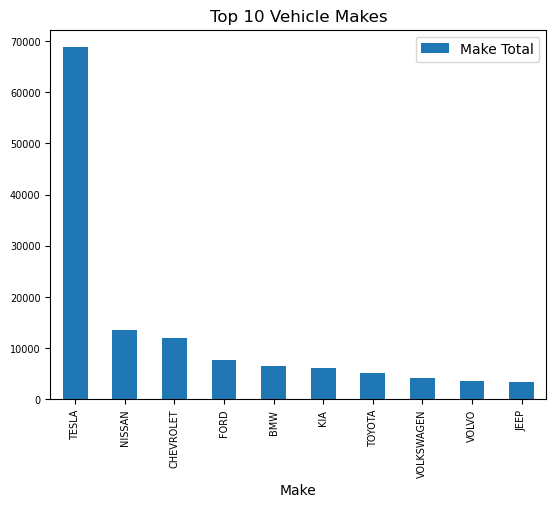

In [6]:
#Create Bar Graph for top 10
car4_df = car3_df.iloc[:10]

bargraph = car4_df.plot.bar(x = 'Make', y = 'Make Total', title = "Top 10 Vehicle Makes", fontsize='7')

In [7]:
#Filter out for only electric Vehicles
electric_df = car2_df.loc[car2_df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

electric_df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
VIN (1-10),,,,,,,,,,,,,,,,
KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
5YJ3E1EAXL,Snohomish,Marysville,WA,98271.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,38.0,124595523,POINT (-122.1713847 48.10433),PUGET SOUND ENERGY INC,5.306194e+10
5YJYGDEE3L,King,Woodinville,WA,98072.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,45.0,124760555,POINT (-122.151665 47.75855),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
5YJ3E1EA1J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,125048003,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10


In [8]:
#Find Total electric cars from each year and sort by year
electric2_df = electric_df.value_counts(['Model Year']).reset_index(name='Year Total')

electric3 = electric2_df.sort_values("Model Year")

electric3

,Model Year,Year Total
21,1997,1
19,1998,1
17,1999,4
16,2000,8
18,2002,2
20,2003,1
15,2008,18
14,2010,21
12,2011,717
11,2012,776


In [9]:
#Add row for "rolling total" the total added onto the previous years total
electric3["Rolling Total"] = ""
electric4 = electric3.replace('',0)
electric5 = electric4.reset_index() 
electric5

,index,Model Year,Year Total,Rolling Total
0,21,1997,1,0
1,19,1998,1,0
2,17,1999,4,0
3,16,2000,8,0
4,18,2002,2,0
5,20,2003,1,0
6,15,2008,18,0
7,14,2010,21,0
8,12,2011,717,0
9,11,2012,776,0


In [10]:
#for loop to execute the rolling total
for index, row in electric5.iterrows():
    electric5.loc[index, "Rolling Total"] = electric5.iloc[index]['Year Total'] + electric5.iloc[index - 1]['Rolling Total']
    
electric5

,index,Model Year,Year Total,Rolling Total
0,21,1997,1,1
1,19,1998,1,2
2,17,1999,4,6
3,16,2000,8,14
4,18,2002,2,16
5,20,2003,1,17
6,15,2008,18,35
7,14,2010,21,56
8,12,2011,717,773
9,11,2012,776,1549


In [11]:
#Filter out just hybrid cars
hybrid_df = car2_df.loc[car2_df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']

hybrid_df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
VIN (1-10),,,,,,,,,,,,,,,,
1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
2C4RC1N77H,King,Kent,WA,98042.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,47.0,1815593,POINT (-122.111625 47.36078),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3FA6P0SU9G,Kitsap,Port Orchard,WA,98367.0,2016,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,26.0,212561716,POINT (-122.6851642 47.506453),PUGET SOUND ENERGY INC,5.303509e+10


In [12]:
#Find total from each year and sort by year
hybrid2_df = hybrid_df.value_counts(['Model Year']).reset_index(name='Year Total')

hybrid_sorted = hybrid2_df.sort_values("Model Year")

hybrid_sorted

,Model Year,Year Total
14,2010,3
13,2011,78
11,2012,854
9,2013,1633
6,2014,1806
10,2015,1302
7,2016,1777
3,2017,4094
1,2018,4384
5,2019,1938


In [13]:
#Add Rolling total column
hybrid_sorted["Rolling Total"] = ""
hybrid_sorted.loc[len(hybrid2_df)] = 0
hybrid_format = hybrid_sorted.sort_values("Model Year")
hybrid2_format = hybrid_format.replace('',0)
hybrid3 = hybrid2_format.reset_index()
hybrid3

,index,Model Year,Year Total,Rolling Total
0,15,0,0,0
1,14,2010,3,0
2,13,2011,78,0
3,11,2012,854,0
4,9,2013,1633,0
5,6,2014,1806,0
6,10,2015,1302,0
7,7,2016,1777,0
8,3,2017,4094,0
9,1,2018,4384,0


In [14]:
#for loop to execute rolling total
for index, row in hybrid3.iterrows():
    hybrid3.loc[index, "Rolling Total"] = hybrid3.iloc[index]['Year Total'] + hybrid3.iloc[index - 1]['Rolling Total']
    
hybrid3

,index,Model Year,Year Total,Rolling Total
0,15,0,0,0
1,14,2010,3,3
2,13,2011,78,81
3,11,2012,854,935
4,9,2013,1633,2568
5,6,2014,1806,4374
6,10,2015,1302,5676
7,7,2016,1777,7453
8,3,2017,4094,11547
9,1,2018,4384,15931


In [15]:
#Remove the 0 row, tried a different method this time so there was a zero row
hybrid4 = hybrid3.iloc[1:]
hybrid4

,index,Model Year,Year Total,Rolling Total
1,14,2010,3,3
2,13,2011,78,81
3,11,2012,854,935
4,9,2013,1633,2568
5,6,2014,1806,4374
6,10,2015,1302,5676
7,7,2016,1777,7453
8,3,2017,4094,11547
9,1,2018,4384,15931
10,5,2019,1938,17869


In [16]:
#recall electric dataframe with rolling total
electric5

,index,Model Year,Year Total,Rolling Total
0,21,1997,1,1
1,19,1998,1,2
2,17,1999,4,6
3,16,2000,8,14
4,18,2002,2,16
5,20,2003,1,17
6,15,2008,18,35
7,14,2010,21,56
8,12,2011,717,773
9,11,2012,776,1549


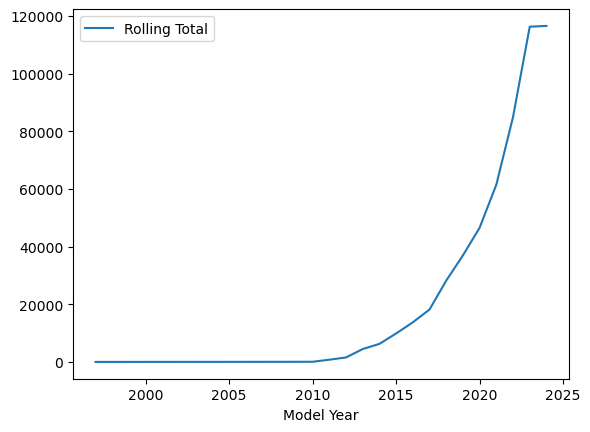

In [17]:
#Plot line graph for electric cars
lines = electric5.plot.line(x='Model Year', y='Rolling Total')

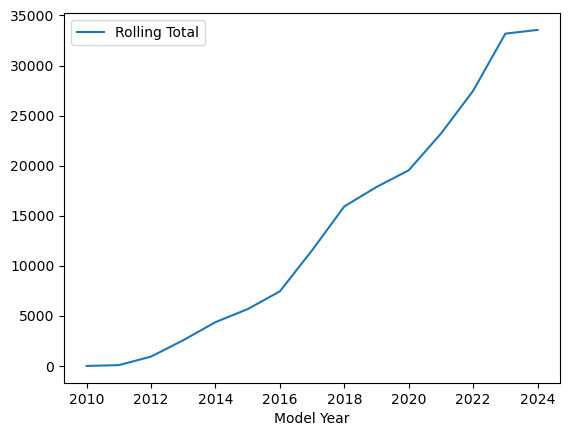

In [18]:
#Plot line graph for hybrid cars
lines = hybrid4.plot.line(x='Model Year', y='Rolling Total')

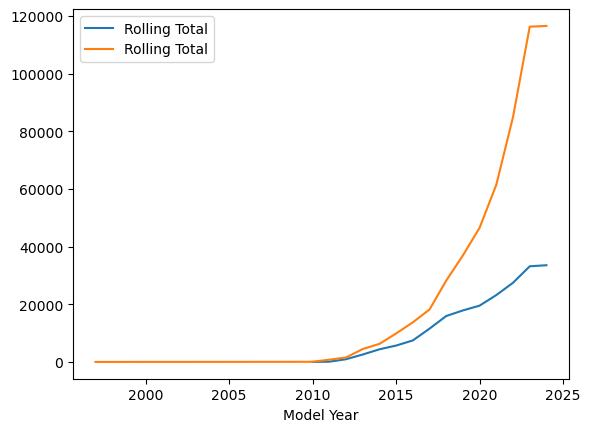

In [19]:
# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
hybrid4.plot(kind='line', x='Model Year', y='Rolling Total', ax=axes);
electric5.plot(kind='line', x='Model Year', y='Rolling Total', ax=axes);

In [20]:
#Change columns names so you can recognise which one is which on line graph
#make electric data start at 2010 for accurate comparison
electric6 = electric5.rename(columns={"Rolling Total": "Electric Cars"})
electric7 = electric6.iloc[7:]

hybrid5 = hybrid4.rename(columns={"Rolling Total": "Hybrid Cars"})

electric7

,index,Model Year,Year Total,Electric Cars
7,14,2010,21,56
8,12,2011,717,773
9,11,2012,776,1549
10,9,2013,2922,4471
11,10,2014,1792,6263
12,8,2015,3617,9880
13,7,2016,3855,13735
14,6,2017,4455,18190
15,3,2018,10023,28213
16,5,2019,8755,36968


Text(0.5, 1.0, 'Hybrid vs Electric cars(2010 Onwards)')

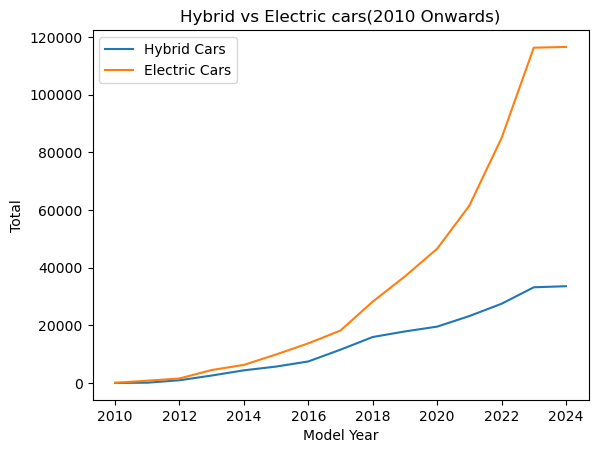

In [21]:
# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
hybrid5.plot(kind='line', x='Model Year', y='Hybrid Cars', ax=axes);
electric7.plot(kind='line', x='Model Year', y='Electric Cars', ax=axes);
plt.ylabel("Total")
plt.title("Hybrid vs Electric cars(2010 Onwards)")

In [22]:
#recall original dataframe
car2_df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
VIN (1-10),,,,,,,,,,,,,,,,
KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [23]:
#find totals for each type
pie_cars = car2_df.value_counts(['Electric Vehicle Type']).reset_index(name='Type Total')

pie2 = pie_cars.set_index('Electric Vehicle Type')

pie2

,Type Total
Electric Vehicle Type,
Battery Electric Vehicle (BEV),116583
Plug-in Hybrid Electric Vehicle (PHEV),33554


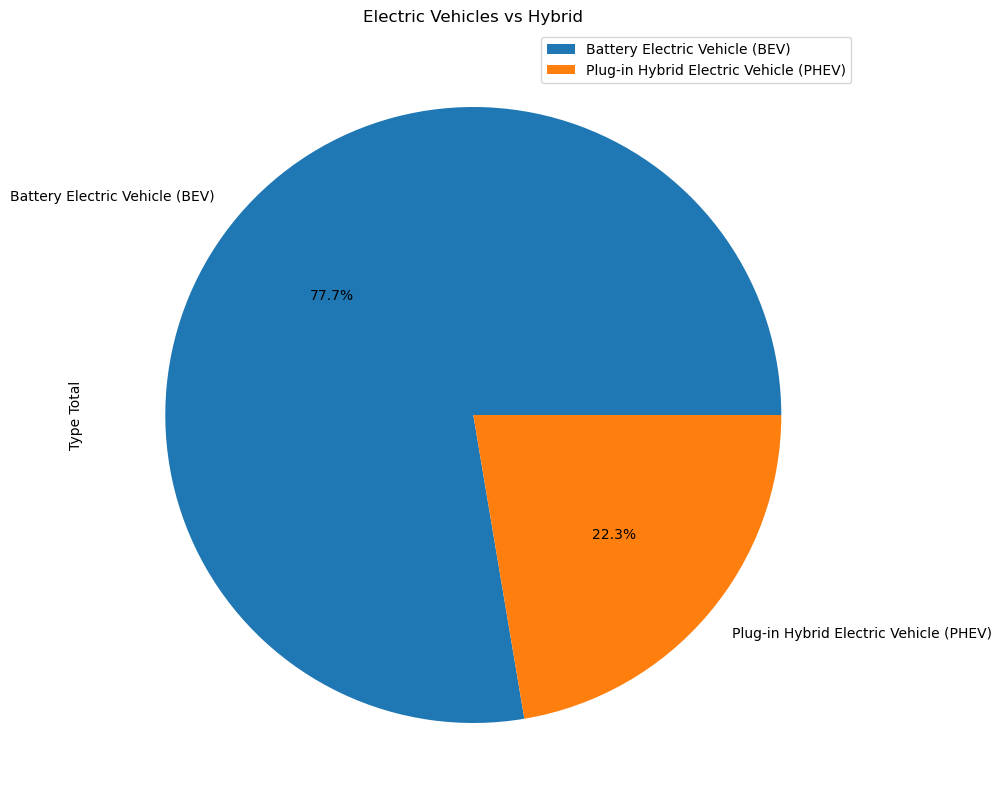

In [24]:
#Plot Pie chart
plot = pie2.plot.pie(y='Type Total',title = "Electric Vehicles vs Hybrid", autopct='%1.1f%%', figsize=(10, 10))

From this visualisation, you can see that Electric vehicles heavily control the market.

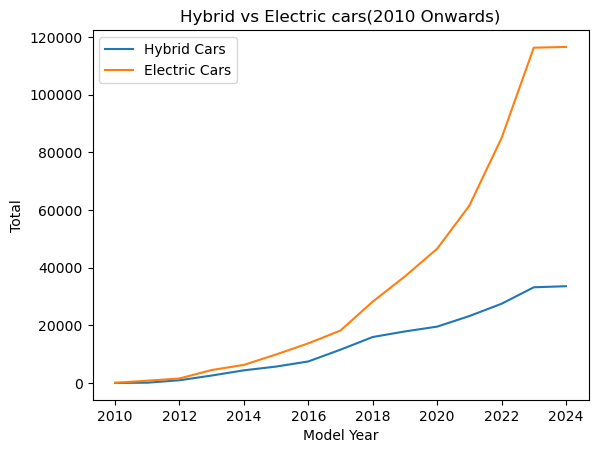

In [27]:
# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
hybrid5.plot(kind='line', x='Model Year', y='Hybrid Cars', ax=axes);
electric7.plot(kind='line', x='Model Year', y='Electric Cars', ax=axes);
plt.ylabel("Total")
plt.title("Hybrid vs Electric cars(2010 Onwards)")

#save as PDF
plt.savefig('linegraph.pdf')

In [28]:
#Call in the graph using PyPDF2 (Python library not used in class)
reader = PdfReader("linegraph.pdf")
number_of_pages = len(reader.pages)
page = reader.pages[0]
text = page.extract_text()

From this visualisation, you can see the growth of Hybrid and Electric cars as a year by year rolling total which takes the previous years total and adds the current years total onto it. You can see that while hybird cars are seeing a linear growth, it pales in comparison to the exponential growth of Electric cars. In particular from 2017 onwards.

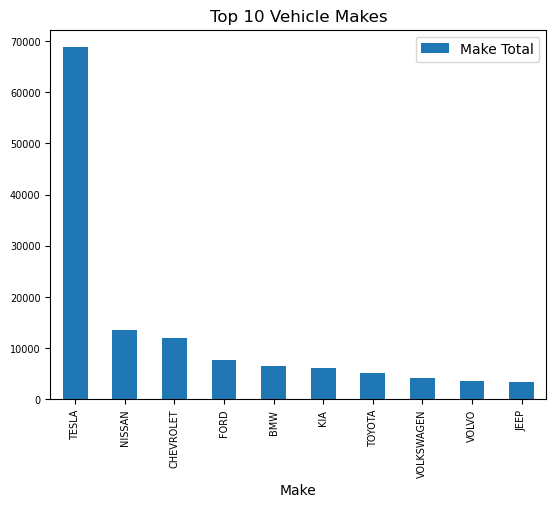

In [26]:
#Create Bar Graph for top 10
car4_df = car3_df.iloc[:10]

bargraph = car4_df.plot.bar(x = 'Make', y = 'Make Total', title = "Top 10 Vehicle Makes", fontsize='7')

From this visualisation, you can see the top 10 best selling EV/HV car brands. Tesla heavily dominates the market, towering over everyone else. Nissan and Chevrolet place 2nd and 3rd respectively.